# *Banking Customer Churn Prediction*

![logo](images/logo.jpg)

## Introdução

O objetivo deste projeto é desenvolver um modelo de *machine learning* que seja capaz de identificar se um cliente de um determinado banco está, ou não, em risco de terminar a sua ligação com um determinado banco.

O modelo deve ser treinado e testado com recurso a um *dataset* disponibilizado no *Kaggle* (https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset), que contém informações sobre os clientes de um banco, como o saldo e o número de produtos, por exemplo, bem como se o cliente abandonou, ou não, o banco, sendo esta a variável-alvo do problema em questão.

A abordagem para extrair conhecimento a partir dos dados consistirá numa adaptação da metodologia CRISP-DM (*Cross-Industry Standard for Data Mining*), dividindo, assim, o processo de mineração de dados em cinco fases: (1) compreensão do tema, (2) compreensão dos dados, (3) preparação dos dados, (4) modelação e (5) avaliação.

### Estrutura

O projeto está organizado da seguinte forma:

* ***code.ipynb***: *Jupyter Notebook* com o código do modelo desenvolvido
* ***data.csv***: *dataset* utilizado para treino e para teste do modelo
* ***README.md***: ficheiro com instruções de execução e utilização do modelo

### Tecnologias

Para o desenvolvimento do projeto, será utilizada a linguagem de programação *Python*, com recurso às seguintes bibliotecas:

* *Matplotlib*, para visualizar os dados
* *Pandas*, para manipular os dados
* *Seaborn*, para visualizar os dados

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

%matplotlib inline

## 1. Compreensão do Tema

### Objetivos do Tema

Um banco é uma instituição financeira cuja principal atividade consiste em receber depósitos dos seus clientes e conceder-lhes créditos.

Por isso, os clientes são essenciais para a existência e o funcionamento de um banco, sendo eles os elementos mais importantes para estas entidades. Assim, torna-se crucial ser capaz de reter os clientes associados a um determinado banco, evitando, se possível, que eles terminem uma ligação já existente.

Para isto, afigura-se extremamente útil para qualquer banco conseguir prever, com exatidão, se um cliente está em risco de o abandonar, de modo que, antecipadamente, seja possível encetar os esforços necessários para que essa decisão do cliente seja reconsiderada, mantendo-o associado ao banco em questão.

### Definição do Problema

O problema consiste em prever se um cliente está, ou não, em risco de terminar a sua ligação com o banco, ou seja, abandonar o banco, tendo como base um conjunto de dados associados ao cliente e conhecidos pelo banco.

### Objetivos do Modelo

O problema em questão reside em classificar cada cliente do banco como pertencente a um de dois grupos, mutuamente exclusivos: em risco de abandonar o banco ou não em risco de abandonar o banco.

Para solucionar o problema, deve ser desenvolvido um modelo de *machine learning* com capacidade para efetuar uma classificação binária que distinga os dois casos possíveis para cada cliente.

Pretende-se que o modelo, devidamente treinado seguindo uma abordagem de *supervised learning*, tenha uma exatidão de 99% a classificar os dados de teste, considerando-se, nesse caso, garantida a sua viabilidade prática.

## 2. Compreensão dos Dados

### Dados Iniciais

O *dataset* fornecido contém 10000 linhas e 14 colunas. 

Cada linha representa um cliente do banco e as colunas são as seguintes:
1. **RowNumber**: número sequencial da linha
2. **CustomerId**: identificador único do cliente
3. **Surname**: apelido do cliente
4. **CreditScore**: pontuação do crédito do cliente
5. **Geography**: país de origem do cliente
6. **Gender**: género do cliente
7. **Age**: idade do cliente (em anos)
8. **Tenure**: tempo de ligação do cliente com o banco (em anos)
9. **Balance**: saldo da conta de cliente (em euros)
10. **NumOfProducts**: número de produtos do banco que o cliente possui
11. **HasCrCard**: indica se o cliente tem cartão de crédito (1 - tem cartão de crédito; 0 - não tem cartão de crédito)
12. **IsActiveMember**: indica se o cliente é um membro ativo (1 - é um membro ativo; 0 - não é um membro ativo)
13. **EstimatedSalary**: salário anual estimado do cliente (em euros)
14. **Exited**: indica se o cliente abandonou o banco (1 - abandonou o banco; 0 - não abandonou o banco)

In [2]:
data = pd.read_csv('data.csv')

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


As colunas *CreditScore*, *Tenure*, *Balance*, *NumOfProducts*, *HasCrCard*, *IsActiveMember* e *EstimatedSalaray* parecem ser aquelas mais relevantes para determinar o valor da variável-alvo (*Exited*), por serem as que mais se relacionam com o banco e com aspetos financeiros do cliente.

Em sentido inverso, os atributos *RowNumber*, *CustomerId* e *Surname* deverão ser completamente irrelevantes para o modelo, por serem meramente indicativos. Por isso, estas colunas poderão vir a ser eliminadas numa próxima fase.

Tendo em conta que existe um número bastante elevado de clientes (10000, que serão divididos em conjuntos de treino e de teste), é crível que será possível extrair conclusões pertinentes dos dados, ou seja, fazer previsões/classificações acertadas, pelo que não se afigura necessário procurar novos dados.

A par disto, o número de atributos considera-se adequado para o problema a tratar e, sendo os dados provenientes de uma só origem, não se vislumbram quaisquer problemas de compatibilidade/coerência.

Finalmente, caso se venham a identificar linhas com valores em falta e/ou incorretos, esses casos serão analisados individualmente: se possível, os valores serão corrigidos, senão, as linhas serão eliminadas, dado que o número total de linhas é suficiente para a criação de um bom modelo.

### Descrição dos Dados

A quantidade de dados atualmente existentes (10000 linhas e 14 colunas) é adequada para o modelo pretendido, permitindo o desenvolvimento de um modelo simultaneamente eficaz (em termos de precisão) e eficiente (em termos de tempo de processamento).

Os tipos dos valores são os seguintes:
1. **RowNumber**: numérico - número inteiro
2. **CustomerId**: númerico - número inteiro
3. **Surname**: categórico - *string*
4. **CreditScore**: numérico - número inteiro
5. **Geography**: categórico - *string*
6. **Gender**: categórico - *string*
7. **Age**: numérico - número inteiro
8. **Tenure**: numérico - número inteiro
9. **Balance**: numérico - número decimal
10. **NumOfProducts**: numérico - número inteiro
11. **HasCrCard**: booleano
12. **IsActiveMember**: booleano
13. **EstimatedSalary**: numérico - número decimal
14. **Exited**: booleano

Nas colunas booleanas, o esquema de codificação consiste em representar "verdadeiro"/"sim" como 1 e "falso"/"não" como 0. A restantes colunas não estão codificadas.

In [ ]:
data.describe()

Ao realizar uma análise estatística descritiva sobre os dados, observando as contagens, a média, o desvio padrão, os extremos (mínimo e máximo) e os quartis (incluindo a mediana) dos valores presentes em cada coluna, constatam-se os seguintes factos:
* As pontuações de crédito variam entre 350 e 850;
* Não existem clientes com menos de 18 anos, nem com mais de 92 anos;
* A duração da ligação dos clientes ao banco nunca é superior a 10 anos;
* Existe pelo menos um quarto dos clientes com saldo nulo, havendo uma grande variância/variabilidade dos valores presentes nesta coluna;
* A maior parte dos clientes tem menos de 2 produtos do banco e nenhum cliente possui mais do que 4 produtos;
* A maioria dos clientes (cerca de 70%) tem cartão de crédito;
* Aproximadamente metade dos clientes são considerados membros ativos, enquanto a outra metade não o é;
* A coluna com o salário estimado dos clientes tem uma amplitude significativa;
* No *dataset* considerado, apenas 20% dos clientes abandonou o banco.

Assim, é possível extrair as seguintes conclusões:
* O *dataset* não é equilibrado, dado que a variável-avo (*Exited*) não divide os clientes em dois grupos aproximadamente iguais, mas sim num grupo com cerca de 2000 clientes e noutro com cerca de 8000 (4 vezes maior);
* Todas as colunas numéricas, excetuando *RowNumber* e *CustomerId*, deverão ser importantes para o desenvolvimento do modelo;
* Em particular, as colunas *Balance*, *NumOfProducts* e *HasCrCard* poderão ser especialmente determinantes para a classificação, na medida em que parece provável que os clientes com saldo nulo, com apenas um produto subscrito e sem cartão de crédito estejam mais próximos de terminar a sua ligação com o banco, dado que o vínculo que liga ambas as partes não será tão forte.

Deste modo, os dados parecem incluir características relevantes para a questão a tratar e existem atributos que, por claramente aparentarem ser mais relevantes, podem ser priorizados.

### Qualidade dos Dados

Nas células de código desta secção, pretende-se procurar e identificar erros nos dados, sejam valores em falta, sejam erros de codificação ou medição, sejam inconsistências, entre outros.

In [ ]:
data.isnull().sum()

In [ ]:
data.isna().sum()

Conforme é possível verificar através do código executado, o *dataset* não contem valores nulos nem N/A, pelo que não existem valores em falta.

In [ ]:
data.nunique()

In [ ]:
data['Geography'].unique()

In [ ]:
data['Gender'].unique()

In [ ]:
data['HasCrCard'].unique()

In [ ]:
data['IsActiveMember'].unique()

In [ ]:
data['Exited'].unique()

Através da descrição dos dados anteriormente efetuada e da análise de valores únicos em cada coluna, também é possível constatar que:
* O intervalo de valores para as pontuações de crédito, [350, 850], é o padrão para esta métrica;
* Não existe nenhum cliente menor de idade (com menos de 18 anos);
* Os valores dos atributos *Tenure* e *NumOfProducts*, ao variarem, respetivamente, de 0 a 10 e de 1 a 4, são todos plausíveis;
* Nenhuma célula numérica tem um valor negativo, o que seria impossível, qualquer que fosse o atributo em causa;
* As colunas categóricas não contêm erros de codificação, dado que *Geography* só toma os valores "France", "Spain" e "Germany", enquanto *Gender* só é "Male" ou "Female";
* Os atributos booleanos assumem unicamente os valores 0 e 1, tal como esperado;

Tudo isto indica que não existem erros de medição nem inconsistências de valores/codificação nos dados constantes do *dataset* fornecido, visto que todos os valores são plausíveis e não só não existe ruído, como também não existem desvios significativos em relação aos valores considerados aceitáveis para cada coluna.

Para além disto, infere-se também que os nomes das colunas transmitem corretamente o significado dos atributos que representam.

Na fase de preparação dos dados, serão excluídas as colunas *RowNumber*, *CustomerId* e *Surname* por serem irrelevantes para o caso a tratar, conforme já explicitado.

### Exploração dos Dados

Nesta fase, desenham-se os gráficos para as colunas consideradas relevantes, tendo em vista a extração de novas conclusões.

In [ ]:
plt.figure(figsize = (20, 15))

notExited = data[data['Exited'] == 0].drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)
exited = data[data['Exited'] == 1].drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

for i, col in enumerate(notExited.columns):
    plt.subplot(4, 3, i + 1)
    sb.histplot(data = notExited[col], color = 'red', label = 'Not Exited')
    sb.histplot(data = exited[col], color = 'blue', label = 'Exited')
    plt.legend(plt.gca().get_legend_handles_labels()[1])

Ao observar os histogramas traçados, salientam-se os seguintes aspetos:
* Não parece existir uma relação direta entre os valores das colunas *CreditScore*, *Tenure*, *Balance* e *EstimatedSalary* com o valor da variável-alvo, dado que as distribuições de ambos os grupos (*Exited* e *Not Exited*) são aproximadamente uniformes, tendo valores semelhantes para a média e variância;
* Parece que os clientes de nacionalidade alemã (*Germany*) têm maior tendência para abandonar o banco, em comparação proporcional com os clientes de outras nacionalidades (*Spain* e *France*);
* Apesar de existirem menos clientes mulheres (*Female*) do que homens (*Male*), há mais mulheres do que homens a terminarem a sua relação com o banco;
* Os clientes que tendem a permanecer no banco têm uma idade média consideravelmente inferior à idade dos clientes que saem do banco, o que pode indicar que este atributo terá mais importância do que a anteriormente prevista;
* Os clientes com exatamente dois produtos subscritos são aqueles que mais permanecem no banco;
* O atributo *HasCrCard* parece, afinal, não ser tão relevante quanto esperado, dado que, independentemente de os clientes terem - ou não - cartão de crédito, abandonam o banco na mesma proporção, aproximadamente;
* Não ser um membro ativo do banco aparenta ser um indicador significativo de que a ligação com o banco está em maior risco de terminar. 

In [ ]:
columns = data.columns.drop(['RowNumber', 'CustomerId', 'Surname'])

Separando as variáveis de acordo com os valores que os seus atributos podem assumir, é possível confirmar as conclusões anteriormente explicitadas e ainda inferir mais alguns detalhes.

In [ ]:
continuous = [col for col in columns if (data[col].nunique() > 11 or col == 'Exited')]

plt.figure(figsize = (15, 15))
sb.pairplot(data[continuous], hue='Exited')

Os gráficos acima confirmam que, independentemente de outros fatores, a faixa etária que mais frequentemente termina a sua ligação com o banco ronda os 50 anos. A par disto, observa-se também uma ligeira tendência abandono do banco para os clientes com menores pontuações de crédito.

In [ ]:
nonBinary = [col for col in columns if data[col].nunique() > 2 and data[col].nunique() <= 11]

plt.figure(figsize = (20, 5))
for (i, column) in enumerate(nonBinary):
    plt.subplot(1, 3, i + 1)
    table = pd.crosstab(data[column], data['Exited'])
    rowSum = table.sum(axis = 1)
    percentages = (table.T / rowSum * 100).T
    annotations = [['{} ({}%)'.format(count, round(percentage)) for percentage, count in zip(row, tableRow)] for tableRow, row in zip(table.values, percentages.values)]
    sb.heatmap(table, annot = annotations, fmt = '', cmap = 'coolwarm', linewidths=.5)

As tabelas acima mostram as frequências absoluta e relativa (dentro de cada linha), detalhando aspetos já observados nos histogramas e acrescentando novas informações.

Em primeiro lugar, mostra-se que, efetivamente, existe uma maior tendência de os clientes alemães abandonarem o banco e, em segundo lugar, não se observa nenhuma correlação representativa entre a coluna *Tenure* e a variável-alvo. Ambas estas conclusões já haviam sido retiradas da análise dos histogramas iniciais.

Finalmente, ao detalhar o retratado no histograma para a variável *NumOfProducts*, constata-se que todos os clientes que possuem 4 produtos do banco abandonam o banco e que, daqueles que possuem exatamente 3 produtos, a grande maioria também termina a sua ligação com o banco. Esta observação contradiz a hipótese inicial de que um menor número de produtos do banco poderia indicar uma maior propensão para abandonar o banco, mostrando exatamente o oposto.

In [ ]:
binary = [col for col in columns if data[col].nunique() == 2 and col != 'Exited']

plt.figure(figsize = (20, 5))
for (i, column) in enumerate(binary):
    plt.subplot(1, 3, i + 1)
    table = pd.crosstab(data[column], data['Exited'])
    rowSum = table.sum(axis = 1)
    percentages = (table.T / rowSum * 100).T
    annotations = [['{} ({}%)'.format(count, round(percentage)) for percentage, count in zip(row, tableRow)] for tableRow, row in zip(table.values, percentages.values)]
    sb.heatmap(table, annot = annotations, fmt = '', cmap = 'coolwarm', linewidths=.5)

Tabelas análogas às anteriores para as variáveis binárias permitem reforçar a informação extraída inicialmente.

Quanto ao género, a proporção de mulheres a abandonar o banco é superior à de homens, mas esta diferença não parece, por si só, ser significativa o suficiente para ser determinante na classificação a efetuar pelo modelo.

No que diz respeito a ter, ou não, cartão de crédito, contrariamente ao que seria de esperar, este facto mostra-se absolutamente irrelevante para aferir a probabilidade de terminar a ligação com o banco, dado que os clientes que têm cartão de crédito abandonam o banco na mesma proporção do que aqueles que não têm esse cartão.

Por último, tal como já observado, confirma-se que, se um cliente for um membro ativo, então esse é um indicador de que é mais provável permanecer ligado ao banco.

<Axes: >

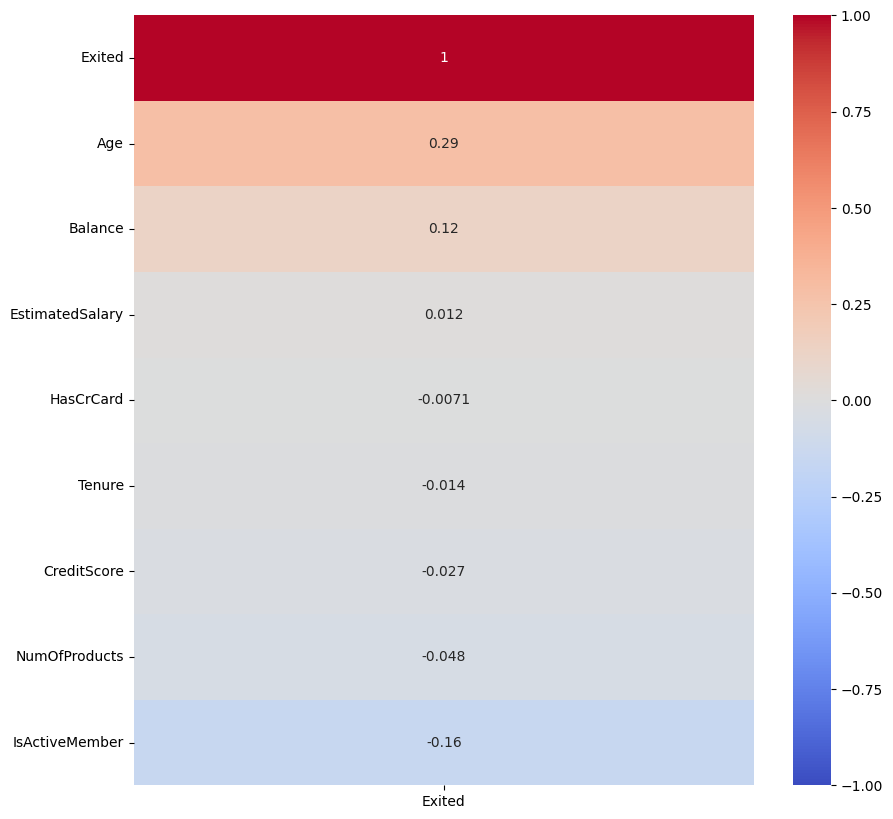

In [19]:
plt.figure(figsize = (10, 10))

#TODO
correlation = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis = 1).corr()
#correlation = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis = 1).corr()[['Exited']].sort_values(by = 'Exited', ascending = False)
sb.heatmap(correlation, annot = True, cmap='coolwarm', vmin = -1, vmax = 1)

Analisando os valores de correlação de cada atributo com a variável-alvo (*Exited*), não se observa nenhuma correlação significativa. A coluna que aparenta ser mais relevante para determinar o valor da variável-alvo é a idade dos clientes, mas, mesmo essa, não apresenta um coeficiente de correlação próximo de 1 (nem de -1). Assim, conclui-se que nenhuma variável, por si só, é suficientemente forte para determinar se um cliente irá, ou não, sair do banco, sendo necessário, para proceder a tal classificação, considerar/combinar os valores de várias váriaveis.

Assim,, as conclusões retiradas da exploração dos dados levaram a alterações às suposições iniciais e à formulação de novas hipóteses, mas também a algumas confirmações.

Por um lado, parece que, afinal, o género, a idade e a nacionalidade poderão ter papéis mais importantes na classificação dos clientes, dado que se mostrou que o género feminino abandona mais o banco do que o género masculino, que a nacionalidade alemã é aquela que tem mais propensão a terminar a sua ligação com o banco e que isto ocorre, maioritariamente, nas faixas etárias próximas dos 50 anos. Por outro lado, o ter, ou não, cartão de crédito não se demonstrou, de todo, relevante para o processo de classificação, enquanto o número de produtos mostrou-se com relevância, mas, afinal, no sentido inverso: os clientes que abandonam o banco são, por norma, aqueles que têm mais de dois produtos subscritos. No entanto, manteve-se e confirmou-se a ideia de que ser um membro ativo é um fator importante um cliente permanecer ligado ao banco.

Para análises futuras, os atributos que parecem ser mais relevantes são a pontuação de crédito, a geografia, o género, a idade, o número de produtos e o ser (ou não) um membro ativo do banco. No sentido inverso, para além das colunas *RowNumber*, *CustomerId* e *Surname*, já consideradas irrelevantes, os atributos *Tenure*, *Balance*, *HasCrCard* e *EstimatedSalary* poderão não ser tão importantes como seria de esperar.

Na verdade, não se verificou qualquer correlação significativa entre alguma coluna e o valor da variável-alvo, pelo que não se espera que nenhuma variável seja preponderante para a classificação binária a efetuar.

Em suma, a exploração dos dados, ao permitir aprofundar conhecimento sobre os mesmos e formular novas hipóteses, diferentes das anteriormente teorizadas, permite manter os objetos estipulados inicialmente e continuar para as fases seguintes com confiança de que os mesmos poderão vir a ser atingidos com sucesso.

## 3. Preparação dos Dados

### Seleção

De acordo com as conclusões retiradas nas secções anteriores, devem ser excluídas do *dataset* as colunas consideradas irrelevantes: *RowNumber*, *CustomerId* e *Surname*.

In [4]:
selectedData = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

selectedData.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Assim, apenas pertencem ao novo *dataset* os atributos que podem ser relevantes para os objetivos definidos inicialmente: *CreditScore*, *Geography*, *Gender*, *Age*, *Tenure*, *Balance*, *NumOfProduct*, *HasCrCard*, *IsActiveMember*, *EstimatedSalary* e *Exited* (variável-alvo), não havendo restrições na utilização de nenhuma columa.

### Limpeza

Tendo em conta que, conforme determinado anteriormente, não existem dados em falta, nem erros nos dados, nem inconsistências de codificação, os dados selecionados já se encontram limpos (sem ruído), pelo que não é necessária nenhuma limpeza adicional.

In [5]:
cleanData = selectedData

### Construção

Como os dados já existentes são, em quantidade e em qualidade, suficientes para o modelo a desenvolver efetuar a classificação binária pretendida, não se afigura necessário derivar novos atributos a partir dos já existentes.

### Transformação

Nesta etapa, compete-nos confirmar se os tipos de dados das colunas são adequados para o desenvolvimento do modelo (por exemplo, numéricos para quantidades e categóricos para classificações). Caso não sejam, é necessário fazer a conversão para o tipo de dados correto.

In [12]:
cleanData.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

No *output* do código acima, *int64* significa um número inteiro de 64 *bits*, *float64* corresponde a um número de vírgula flutuante representado com 64 *bits* e *object* é um tipo de dados que contém *strings*.

*CreditScore*, *Age*, *Tenure* e *NumOfProducts* são variáveis quantitativas discretas, pelo que o tipo *int64* é adequado.

*Balance* e *EstimatedSalary* são dados quantitativos contínuos, pelo que o tipo *float64* está apropriado.

*Geography* e *Gender* são variáveis qualitativas categóricas, pelo que *object* é o tipo correto para as representar. Contudo, para permitir a análise por parte dos algoritmos de *machine learning*, estas colunas devem ser codificadas em valores numéricos (*int32*, por serem dados discretos).

*HasCrCard*, *IsActiveMember* e *Exited*, ao serem variáveis booleanas e, por isso, binárias, podem ser consideradas quantintativas discretas, pelo que podem e devem ser representadas pelo tipo *int64*, como atualmente se encontram.

In [10]:
cleanData = pd.get_dummies(cleanData, drop_first = True, dtype = int)

cleanData.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
cleanData.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int32
Geography_Spain        int32
Gender_Male            int32
dtype: object

Deste modo, os dados estão finalmente prontos para servirem de treino e teste do modelo.

## 4. Modelação

### Escolha do Algoritmo

### *Test Design*

### Construção/Desenvolvimento

### Afinação dos Parâmetros

## 5. Avaliação

### Avaliação dos Resultados

### Revisão

### Próximos Passos